plotting_utils.py

In [1]:
import matplotlib.pyplot as plt
import numpy as np


def plot2d(h, xbins, ybins, ax=None, **plot_kwargs):
    '''
    Plots already binned data in a histogram
    Provide explicit axes to choose where to plot it, otherwise the current axes will be used'''
    if ax==None:
        ax = plt.gca() # get current axes
    
    ax.matshow(h.transpose(), extent=[xbins[0], xbins[-1], ybins[0], ybins[-1]], aspect='auto', origin='lower', **plot_kwargs)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    return ax

def plot1d(h, bins, ax=None, **plot_kwargs):
    '''
    Plots already binned data in a histogram
    Provide explicit axes to choose where to plot it, otherwise the current axes will be used'''
    if ax==None:
        ax = plt.gca() # get current axes
    # creating a list of the bin centers
    binw = bins[1]-bins[0] # assuming equal spaced bins
    binc = [ b + binw/2 for b in bins[:-1]]

    ax.bar(binc, h, width=binw, **plot_kwargs)
    return ax

def get_bin_centres(bins_edges, dtype='list'):
    binw = bins_edges[1]-bins_edges[0] # assuming equal spaced bins
    binc = [ b + binw/2 for b in bins_edges[:-1]]
    if dtype == 'ndarray':
        binc = np.array(binc)

    return binc

def get_bin_index(value, bins_edges):
    for index, edge in enumerate(bins_edges):
        if value > edge and value < bins_edges[index + 1]:
            return index

configuration.py

In [2]:
#change these folders depending on where you want to save data and plots
DATA_FOLDER = "C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/photosensor-calibration/data/"
PLOTS_FOLDER = "C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/photosensor-calibration/plots/"
RESULTS_FOLDER = "C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/photosensor-calibration/results/"

LOC_DATA_SIPM = "C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/"
LOC_DATA_PMT = "C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/Data_PMT/"

read_data.py

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import sys 
#sys.path.append("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/todor_fresh/photosensor-calibration/utils/")
#from plotting_utils import plot2d
import matplotlib.colors
import matplotlib.cm as colormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
#from configuration import PLOTS_FOLDER



def generate_counter_string(iterator):
    """Generate the counter string in every filename from an integer. (e.g. 00023 from 23)

    Parameters
    ----------
    iterator : int
        the file count 

    Returns
    -------
    string
        The file name ending
    """
    appendix = ""
    if iterator < 10:
        appendix = "0000{}".format(iterator)
    elif iterator < 100:
        appendix = "000{}".format(iterator)
    elif iterator < 1000:
        appendix = "00{}".format(iterator)
    elif iterator < 10000:
        appendix = "0{}".format(iterator)
    else:
        print("Illegal filename exception")
        appendix = "00000"  

    return appendix  



def read_large_file(filename, loc="/home/todor/University/MPhys project/MPhys_project/analyze-lecroy/data/"):
    """Read a single large file

    Parameters
    ----------
    filename : str
        filename
    loc : str, optional
        filepath, by default "/home/todor/University/MPhys project/MPhys_project/analyze-lecroy/data/"

    Returns
    -------
    _type_
        _description_
    """
    all_waveforms = []
    raw_data = np.genfromtxt(loc + filename, skip_header=0, delimiter=',')
    new_waveform = np.array([[-1, -1]])
    for index, entry in enumerate(raw_data):
            #print(entry)
        if entry[0] < raw_data[index - 1, 0]:
            if index == 0:
                new_waveform = np.append(new_waveform, [entry], axis=0)
                continue
            new_waveform = np.delete(new_waveform, 0, axis=0)
            all_waveforms.append(new_waveform)
                #new_waveform = [entry]
            new_waveform = np.array([[-1, -1], entry])
                #print("saving...")
        else:
                

            new_waveform = np.append(new_waveform, [entry], axis=0)
                #new_waveform.append(entry)
            if index == len(raw_data) - 1:
                    #print(new_waveform)
                new_waveform = np.delete(new_waveform, 0, axis=0)
                all_waveforms.append(new_waveform)
                    #new_waveform = []
                new_waveform = np.array([[-1, -1]])    
    
    return all_waveforms



def iterate_large_files(start, stop, filename, segment_no=1000, loc="/home/todor/University/MPhys project/MPhys_project/analyze-lecroy/data/"):
    """Iterate over all files and split all the segments into a single list

    Parameters
    ----------
    start : int
        filename count start
    stop : int
        filename count stop
    filename : string
        the filename to look for
    segment_no : int, optional
        the number of segments in each file, by default 1000
    loc : str, optional
        the location of the file, by default "/home/todor/University/MPhys project/MPhys_project/analyze-lecroy/data/"

    Returns
    -------
    list<numpy.array>
        a list with each entry being an numpy array containing the time in the 0th column and the amplitude in the 1st column
    """

    header = 4 + segment_no
    all_waveforms = []
    print("Reading files...")
    for iterator in tqdm(range(start, stop)):
        file = loc + filename + generate_counter_string(iterator) + ".csv"
        raw_data = np.genfromtxt(file, skip_header=header, delimiter=',')
        #new_waveform = []
        new_waveform = np.array([[-1, -1]])
        for index, entry in enumerate(raw_data):
            #print(entry)
            if entry[0] < raw_data[index - 1, 0]:
                if index == 0:
                    new_waveform = np.append(new_waveform, [entry], axis=0)
                    continue
                new_waveform = np.delete(new_waveform, 0, axis=0)
                all_waveforms.append(new_waveform)
                #new_waveform = [entry]
                new_waveform = np.array([[-1, -1], entry])
                #print("saving...")
            else:
                

                new_waveform = np.append(new_waveform, [entry], axis=0)
                #new_waveform.append(entry)
                if index == len(raw_data) - 1:
                    #print(new_waveform)
                    new_waveform = np.delete(new_waveform, 0, axis=0)
                    all_waveforms.append(new_waveform)
                    #new_waveform = []
                    new_waveform = np.array([[-1, -1]])
        
        #print(all_waveforms)

    return all_waveforms

def make_heatmap(all_waveforms, save=False, savename="initial_data_reading_10x1000waveforms_heatmap.png", plot_title=False, title="Recorded waveforms for a single SiPM at 56V bias"):
    """Make a heatmap of the waveforms (faster than plotting all waveforms)

    Parameters
    ----------
    all_waveforms : list<numpy.array>
        a list of numpy arrays with each array being 1 waveform with timepoints in the 0th column and amplitudes in the 1st column
    save : bool, optional
        save the figure or not, by default False
    savename : str, optional
        name of the file to save, by default "initial_data_reading_10x1000waveforms_heatmap.png"
    """
    time = []
    amplitude = []
    print("Making a heatmap...")
    for index, waveform in tqdm(enumerate(all_waveforms)):
        for index_inner, single_point in enumerate(waveform):
            time.append(single_point[0])
            amplitude.append(single_point[1])

    time = np.array(time)
    time *= 10**9
    amplitude = np.array(amplitude)
    amplitude *= 10**3
        
    
    
    image, x_edges, y_edges = np.histogram2d(time, amplitude, bins=[400, 300])
    image = np.where(image == 0, np.full(np.shape(image), np.nan), image)
    
    fig = plt.figure(figsize=(12, 9))
    axes = fig.add_subplot()

    ax = plot2d(image, x_edges, y_edges, axes, norm=matplotlib.colors.LogNorm())
    im = axes.imshow(np.log10(image.T), aspect='auto', extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]],
                     origin='lower', cmap='viridis')
    axes.set_xlabel('time[ns]', fontsize=22)
    axes.set_ylabel("Amplified signal[mV]", fontsize=22)
    axes.tick_params(axis='both', which='major', labelsize=18)
    axes.tick_params(axis='both', which='minor', labelsize=18)
    divider = make_axes_locatable(axes)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im, cax=cax, orientation='vertical')
    cbar.set_label("Observed Frequency", fontsize=22)
    cax.tick_params(axis='both', which='both', labelsize=18)
    fig.tight_layout()
    
    
    if plot_title == True:
        axes.set_title(title, fontsize=22)

    if save == True:
        loc = PLOTS_FOLDER
        fig.savefig(loc + savename, dpi=600)

    plt.show()


    
# if __name__ == "__main__":
#     all_waveforms = iterate_large_files(0, 25, "C1--850V_pmt-0047_1000--", loc="C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/Data_PMT/Data_PMT/0047/850V/")

#     make_heatmap(all_waveforms, False, "pmt-0047_850V_25000waveforms.png", False)

compute_area.py

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
#import read_data as reader
from scipy.stats import crystalball
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
import sys
#change this folder so the import is correct
#sys.path.append("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/todor_fresh/photosensor-calibration/utils/")
# from plotting_utils import plot1d
# from plotting_utils import get_bin_centres
# from plotting_utils import get_bin_index
# from read_data import make_heatmap
from scipy.stats import norm
from scipy.stats import moyal
from landaupy import landau
from landaupy import langauss
from copy import deepcopy
from iminuit import Minuit
from iminuit import cost
import iminuit
from scipy import odr

# from configuration import DATA_FOLDER
# from configuration import PLOTS_FOLDER
# from configuration import RESULTS_FOLDER
# from configuration import LOC_DATA_SIPM
# from configuration import LOC_DATA_PMT


def mirror_crystalball(x, beta, m, loc, scale, norm, offset):
    result = crystalball.pdf(-x, beta, m, -loc, scale) * norm + offset
    return result


def linear(x, a, b):
    return a * x + b


def norm_gaus(x, loc, sigma, normalisation):
    return norm.pdf(x, loc, sigma) * normalisation





def chi2(data, model, unc, no_params=21):
    """A function to calculate the chi^2.  Can be replaced with Minuit.cost.LeastSquares

    Parameters
    ----------
    data : list
        experimental data
    model : list
        theoretical values
    unc : list
        errors in the theoretical values
    no_params : int, optional
        number of parameters for reduced chi^2 calculation, by default 21

    Returns
    -------
    float
        chi^2
    """
    chi2 = np.sum((data - model)**2 / unc**2)
    chi2_per_DoF = chi2 / (len(data) - no_params)
    print("Chi2 : {0} and chi2 per DoF : {1}".format(chi2, chi2_per_DoF))
    return chi2




def determine_roi(all_waveforms, plot=False):
    """Determine the Region of Interest (ROI).  Locate the common peak in all waveforms 
    and the beginning of integration region.  An end value for the ROI is provided but is later 
    discarded.

    Parameters
    ----------
    all_waveforms : list of 2d np arrays
        list with each entry being a 2d np array describing a waveform with columns (time, amplitude)
    plot : bool, optional
        plot the determined roi or not, by default False

    Returns
    -------
    int, int, int
        indices of begin of ROI, end of ROI, location of peak
    """
    time = []
    amplitude = []
    bins = len(all_waveforms[0])
    
    print("Determining ROI...")
    for index, waveform in tqdm(enumerate(all_waveforms)):
        for index_inner, single_point in enumerate(waveform):
            time.append(single_point[0])
            amplitude.append(single_point[1])
    
    smallest = np.min(amplitude)
    amplitude = amplitude + np.abs(smallest)

    time = np.array(time)
    time *= 10**9

    hist, edges = np.histogram(time, bins, weights=amplitude)
    plot1d(hist, edges, alpha= 0.2, label='raw signal')
    hist_filtered = savgol_filter(hist, 60, 9)
    hist_deriv = savgol_filter(hist, 60, 9, 1, edges[1] - edges[0])
    visual_extrema = np.where(np.abs(hist_deriv) <= np.max(hist_deriv)/30, hist_filtered, np.full(np.shape(hist), np.nan))
    plot1d(hist_filtered, edges, alpha = 0.2, color='r', label='smoothed signal')
    #plt.scatter(get_bin_centres(edges), visual_extrema,  color='r')
    
    numerical_extrema = np.where(np.isnan(visual_extrema) , np.zeros(np.shape(visual_extrema)), visual_extrema)
    
    max_loc = np.argmax(numerical_extrema)
    plt.scatter(get_bin_centres(edges)[max_loc], visual_extrema[max_loc], color='r')
    #print(visual_extrema[max_loc])

    #define some dummy variables to find the peak before 
    iterator = max_loc
    activate = False
    roi_begin = 0

    while iterator >= 0:

        if(numerical_extrema[iterator] == 0):
            activate = True
        
        else:
            if activate == True:
                roi_begin = iterator
                break


        iterator -= 1


    plt.scatter(get_bin_centres(edges)[roi_begin], visual_extrema[roi_begin], color='r')

    #For the upper ROI limit just take 3 times the 
    diff = max_loc - roi_begin
    roi_end = max_loc + 1 * diff
    

    #plt.scatter(get_bin_centres(edges)[roi_end], hist_filtered[roi_end], color='r')
    plt.xlabel("time[ns]", fontsize = 18)
    plt.ylabel("Summed signal[V]", fontsize = 18)
    #plt.title("ROI determination")
    plt.legend(fontsize=18)
    plt.tick_params(axis='both', labelsize=16)
    plt.tight_layout()
    

    if plot==True:
        #plt.savefig("PLOTS_FOLDER + ROI_example_sipm.png", dpi=600)
        plt.show()
    plt.cla()
    print("ROI determined to be [{0}:{1}]".format(roi_begin, roi_end))

    return roi_begin, roi_end, max_loc


def filter_outliers(all_waveforms, max_loc, roi=[], plot=False):
    """Filters waveforms that peak away from the predetermined peak

    Parameters
    ----------
    all_waveforms : list of ndarray
        a list containing all waveforms, each waveform is an ndarray with first column time[s]
        and second column amplitude[V]
    max_loc : int
        index of the peak in every waveform
    roi : list, optional
        begin and end indices of the roi, by default []
    plot : bool, optional
        plot the waveforms or not, by default False

    Returns
    -------
    list of ndarray
        list of filtered waveforms
    """    
    filtered_waveforms = []
    double_filtered_waveforms = []
    trash = []  #use for testing
    max_diff = 0
    all_baseline_vars = []
    all_diff = []
    trashed_var = 0
    print("Calculating average values...")
    for index, waveform in tqdm(enumerate(all_waveforms)):
        maximum_value_loc = np.argmax(waveform[:, 1])

        
        max_value = np.max(waveform[:, 1])
        min_value = np.min(waveform[:, 1])
        diff = max_value - min_value
        all_diff.append(diff)
        if diff > max_diff:
            max_diff = diff
        
        """
        if diff < max_diff / 10:
            filtered_waveforms.append(waveform)
            continue
        """
        baseline_var = np.var(waveform[:roi[0], 1])
        all_baseline_vars.append(baseline_var)


        """
        if(maximum_value_loc < roi[1] and maximum_value_loc > roi[0]):


            if np.abs(maximum_value_loc - max_loc) > (max_loc - roi[0])*0.7:
                trash.append(waveform)
                continue
            filtered_waveforms.append(waveform)
            continue
        trash.append(waveform)
        """

    average_diff = np.average(all_diff)
    average_baseline_var = np.average(all_baseline_vars)
    baseline_var_cut = np.quantile(all_baseline_vars, 1.00)
    #print(baseline_var_cut)
    
    print("Eliminating outliers...")
    for index1, waveform1 in tqdm(enumerate(all_waveforms)):
        maximum_value_loc = np.argmax(waveform1[:, 1])
        max_value = np.max(waveform1[:, 1])
        min_value = np.min(waveform1[:, 1])
        diff = max_value - min_value
        if diff < average_diff / 2:
            filtered_waveforms.append(waveform1)
            continue
        
        baseline_var = np.var(waveform1[:roi[0], 1])
        if baseline_var > baseline_var_cut:
            trash.append(waveform1)
            trashed_var += 1
            continue
        
        if(maximum_value_loc < roi[1] and maximum_value_loc > roi[0]):


            if np.abs(maximum_value_loc - max_loc) > (max_loc - roi[0])*0.7:
                trash.append(waveform1)
                continue
            filtered_waveforms.append(waveform1)
            continue
        trash.append(waveform1)

        



    if plot == True:
        #make_heatmap(filtered_waveforms)

        #make_heatmap(trash[10:12], True, "example_filtered.png")
        plot_indices = [10, 11]
        lim_max = np.max(np.vstack(filtered_waveforms)[:, 1])
        lim_min = np.min(np.vstack(filtered_waveforms)[:, 1])
        for index in plot_indices:
            plt.plot(trash[index][:, 0], trash[index][:, 1])
        plt.ylim(bottom=lim_min, top=lim_max)
        plt.show()
        #np.savetxt("/home/todor/University/MPhys project/MPhys_project/analyze-lecroy/data/rejected_waveforms_example.csv", np.vstack(trash), delimiter=',')
    
    print("Total entries left after filtering: {}".format(len(filtered_waveforms)))
    
    return filtered_waveforms


def find_area(selected_waveforms, roi=[], no_bins=150, plot=False, save=False, save_loc=DATA_FOLDER, savename="areas_sipm-1_56V_sl.csv"):
    """
    Filters waveforms that have high slope in the baseline region (top and bottom 10%) 
    Calculates integration limits for all waveforms (non-flat ones)
    Shifts all waveforms to 0
    Integrates in the determined regions all waveforms (or up until the average of other regions)
    Saves all areas to a file

    Parameters
    ----------
    selected_waveforms : list of ndarray
        a list containing all waveforms after first filter, each waveform is an ndarray with first column time[s]
        and second column amplitude[V]
    roi : list, optional
        begin and end indices of roi(the end is discarded, only used as an initial estimation), by default []
    no_bins : int, optional
        number of bins in histogram, by default 150
    plot : bool, optional
        show plots of waveforms after filtering and shifting and areas histogram, by default False
    save : bool, optional
        save the areas to csv file or not, by default False
    save_loc : str, optional
        location of the saved csv, by default DATA_FOLDER
    savename : str, optional
        filename of the areas csv, by default "areas_sipm-1_56V_sl.csv"

    Returns
    -------
    list<float>, ndarray, ndarray
        list of all areas, histogrammed areas, bins of the histogram
    """    
    areas = []
    #all_amplitudes = np.array([])
    shifted_waveforms = []
    negative_waveforms = []
    negative_var = []
    slopes = []
    print("Calculating areas...")
    roi_upper_all = [roi[1]]

    for index_1, waveform_1 in enumerate(selected_waveforms):
        #looking for minimum
        baseline = np.average(waveform_1[:roi[0], 1])
        waveform_1[:, 1] -= baseline
        #if(- np.min(waveform_1[:, 1]) < np.max(waveform_1[:, 1] / 0.75)):
            #shifted_waveforms.append(waveform_1)
        
        popt, pcov = curve_fit(linear, waveform_1[:roi[0], 0], waveform_1[:roi[0], 1])
        slopes.append(popt[0])
        """
        below_zero = np.flatnonzero(waveform_1[:, 1] < 0)
        if len(below_zero) < len(waveform_1[:, 1]) /2:

            shifted_waveforms.append(waveform_1)
        else:
            negative_waveforms.append(waveform_1)
            negative_var.append(np.var(waveform_1[:, 1]))
        """
        roi_effective = list(roi)
        peak_loc = np.argmax(waveform_1[:, 1])
        
        
        tail_indices = np.flatnonzero(waveform_1[peak_loc:, 1] <= np.max(waveform_1[:, 1]) * 0.1)
        if(tail_indices.size == 0):
            tail_indices = [0]
        tail_indices += peak_loc
        if tail_indices[0] > roi_effective[1]:
            
            roi_effective[1] = deepcopy( tail_indices[0])
            roi_upper_all.append(roi_effective[1])

        #all_amplitudes = np.append(all_amplitudes, waveform_1[:, 1])
    #var_cut = np.quantile(negative_var, 0.65)
    slope_cut_max = np.quantile(slopes, 0.9)
    slope_cut_min = np.quantile(slopes, 0.1)
    for index_2, waveform_2 in enumerate(selected_waveforms):
        if(slopes[index_2] <= slope_cut_max and slopes[index_2] >= slope_cut_min):
            shifted_waveforms.append(waveform_2)
        else:
            negative_waveforms.append(waveform_2)

    if plot == True:
        make_heatmap(shifted_waveforms, True, "shifted_waveforms_sipm-411_56V.png", False, "Waveforms after filtering for a single PMT at 850V")
        
    #shift = - np.min(all_amplitudes)
    
    #negative_waveforms = []
    
    for index, waveform in tqdm(enumerate(shifted_waveforms)):
        #waveform[:, 1] = waveform[:, 1] + shift #shift to above 0 before integration

        roi_effective = list(roi)
        peak_loc = np.argmax(waveform[:, 1])
        tail_indices = np.flatnonzero(waveform[peak_loc:, 1] <= np.max(waveform[:, 1]) * 0.1)
        if(tail_indices.size == 0):
            tail_indices = [0]
        tail_indices += peak_loc
        #print(tail_indices[0])
        if tail_indices[0] > roi_effective[1]:
            
            roi_effective[1] = deepcopy( tail_indices[0])
            
            
            #print(roi_effective)
        else:
            roi_effective[1] = int(np.average(roi_upper_all))
        
        integral = np.trapz(waveform[roi_effective[0]:roi_effective[1], 1], waveform[roi_effective[0]:roi_effective[1], 0], waveform[1, 0] - waveform[0, 0])
        areas.append(integral)
        if integral < 7e-11 and integral > 3e-11:
            #negative_waveforms.append(waveform)
            continue

    print("New ROI upper limit changed from {0} to {1}".format(roi[1], np.average(roi_upper_all)))  #check which roi limit is better
    

    hist, bins = np.histogram(areas, no_bins)
    if plot == True:
        plot1d(hist, bins)
        plt.xlabel("Charge [Vs]")
        plt.ylabel("Frequency")
        plt.title("SiPM Characterisation Finger Plot")
        plt.savefig(PLOTS_FOLDER + "areas_example_sipm.png", dpi=600)
        plt.show()
        #make_heatmap(negative_waveforms, True, "cancelled_waveforms.png")
        #np.savetxt("/home/todor/University/MPhys project/MPhys_project/analyze-lecroy/data/cancelled_waveforms_example_2.csv", np.vstack(negative_waveforms), delimiter=',')
    
    if save == True:
        fname = save_loc + savename
        np.savetxt(fname, areas, delimiter=',')
        print("Areas saved to file at: " + fname)

    return areas, hist, bins




    

def procedure_areas_save(sipm_no=411, voltage="56V", Ch=None, sipm_str='1'):
    """Procedure to call the functions to read data, find ROI, filter waveforms,
    integrate and save all areas to file

    Parameters
    ----------
    sipm_no : int, optional
        The number of the sipm as written in the data file names, by default 411
    voltage : str, optional
        voltage as written in the data file names, by default "56V"
    Ch : _type_, optional
        channel prefix added by scope, by default None
    sipm_str : str, optional
        in the case 2 sipms were recorded at once this string is how the filename was recorded, by default '1'
    """
    fname = voltage + "_sipm-" + sipm_str + "_1000--"
    if Ch != None:
        fname = Ch + "--" + fname
    location = LOC_DATA_SIPM+ str(sipm_no) + "/" + voltage + "/"
    all_waveforms = reader.iterate_large_files(0, 25, fname, loc=location)
    roi_begin, roi_end, peak_loc =  determine_roi(all_waveforms, plot=False)
    roi = [roi_begin, roi_end]
    
    filtered_waveforms = filter_outliers(all_waveforms, peak_loc, roi, plot=False)
    areas, hist, bins = find_area(filtered_waveforms, roi, no_bins=300, save=True, plot=True, savename="areas_sipm-" + str(sipm_no) + "_" + voltage + ".csv")


def procedure_bkg():
    """Procedure to analyze and find the histogram of the background (datasets with no LED power)
    """
    all_waveforms = reader.iterate_large_files(0, 23, "C2--57V_sipm-412413_bkg_1000--", loc=LOC_DATA_SIPM + "413/bkg/")
    roi_begin, roi_end, peak_loc =  38, 381, 110
    roi = [roi_begin, roi_end]
    filtered_waveforms = filter_outliers(all_waveforms, peak_loc, roi, plot=False)
    areas, hist, bins = find_area(filtered_waveforms, roi, no_bins=600, save=True, plot=True, savename="areas_sipm-413_bkg_57V.csv")
    plot1d(hist, bins)
    plt.xlabel("Charge[V.s]")
    plt.ylabel("Entries[2.7 counts/(nV.ms)]")
    plt.title("Data readout with no LED")
    plt.show()



        
def find_all_areas(sipm_no=411, voltage=[54, 59], Ch=None, sipm_str='1'):
    """calls procedure_areas_save for all voltages of a single SiPM

    Parameters
    ----------
    sipm_no : int, optional
        SiPM number as written in all data files, by default 411
    voltage : list, optional
        lower and upper limit of voltages to iterate over, by default [54, 59]
    Ch : str, optional
        channel prefix sometimes added by scope in the data file name, by default None
    sipm_str : str, optional
        if 2 sipms are read at once they are saved under the same name.  THis replaces sipm_no, i.e. '412413', by default '1'
    """
    for V in range(voltage[0], voltage[1] + 1):
        
        V_string = str(V) + "V"
        print("saving data for " + V_string)
        procedure_areas_save(sipm_no=sipm_no, voltage=V_string, Ch=Ch, sipm_str=sipm_str)

def make_pretty_plots():
    """Make pretty plots for presentation.  No use for the actual analysis
    """
    all_waveforms = reader.iterate_large_files(0, 25, "56V_sipm-1_1000--", loc=LOC_DATA_SIPM + "411/56V/")
    roi1, roi2, max_loc = determine_roi(all_waveforms, True)
    
    filtered_waveforms = filter_outliers(all_waveforms, max_loc, [roi1, roi2], plot=True)
    
    find_area(filtered_waveforms, [roi1, roi2], 600, True)
    
    rejected_1 = reader.read_large_file("rejected_waveforms_example.csv")
    rejected_2 = reader.read_large_file("cancelled_waveforms_example_2.csv")
    # shift waveforms
    for index, entry in enumerate(rejected_1):
        displacement = np.average(entry[:roi1, 1])
        entry[:, 1] -= displacement
        rejected_1[index] = entry
    indices_1 = [51, 23]
    indices_2 = [123, 222]
    for index_1 in indices_1:
        plt.plot(rejected_1[index_1][:, 0], rejected_1[index_1][:, 1], color='r', label="first filter")
    for index_2 in indices_2:
        plt.plot(rejected_2[index_2][:, 0], rejected_2[index_2][:, 1], color='b', label="second filter")

    plt.xlabel("Time [s]")
    plt.ylabel("Amplified signal [V]")
    plt.title("Rejected waveform examples")
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    plt.tight_layout()
    plt.savefig(PLOTS_FOLDER + "rejected_examples.png")
    plt.show()


def make_background_plot():
    data = np.genfromtxt(DATA_FOLDER + "areas_sipm-411_bkg_57V.csv", delimiter=',')
    data_range = np.max(data) - np.min(data)
    bin_size = 2.7e-12
    bins = int(data_range / bin_size)
    plt.hist(data * 10**9, bins)
    plt.xlabel("Charge [nV.s]", fontsize=15)
    plt.ylabel("Frequency [{0:3.1f} counts / (nV.ms)]".format(bin_size* 10**12), fontsize=15)
    plt.tick_params('both', labelsize=13)
    plt.tight_layout()
    plt.savefig(PLOTS_FOLDER + "background_sipm_411.png", dpi=600)
    plt.show()





def make_sipm_snr_plot():
    font = 18
    sipm_number = ["411", "412", "413", "414", "417", "418", "419"]
    colors = ["b", "r", "g", "c", "m", "y", "k"]
    symbols = ['.', 'x', 'o', "s", "D", "v", "^"]
    breakdown_voltage = [51.5, 51.2, 51.4, 51.4, 51.3, 51.3, 51.3]
    err_breakdown = [0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2]
    for index, sipm in enumerate(sipm_number):
        data = np.genfromtxt(RESULTS_FOLDER + "results_sipm-" + sipm + ".csv", delimiter=',', skip_header=1)
        plt.errorbar(data[:, 0] - breakdown_voltage[index], data[:, 3], data[:, 4], err_breakdown[index], fmt=symbols[index], capsize=2.5, label=sipm, color=colors[index], alpha=0.7)
    
    plt.legend(fontsize=font-5)
    plt.xlabel("Overvoltage [V]", fontsize=font)
    plt.ylabel("SNR", fontsize=font)
    plt.tick_params('both', labelsize=font-2)
    plt.tight_layout()
    plt.savefig(PLOTS_FOLDER + "all_snr_sipm.png", dpi=600)
    plt.show()


def simple_linear(x, a):
    return a * x

def make_sipm_gain_plot():
    font = 18
    sipm_number = ["411", "412", "413", "414", "417", "418", "419"]
    colors = ["b", "r", "g", "c", "m", "y", "k"]
    symbols = ['.', 'x', 'o', "s", "D", "v", "^"]

    breakdown_voltage = [51.5, 51.2, 51.4, 51.4, 51.3, 51.3, 51.3]
    err_breakdown = [0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2]
    for index, sipm in enumerate(sipm_number):
        data = np.genfromtxt(RESULTS_FOLDER + "results_sipm-" + sipm + ".csv", delimiter=',', skip_header=1)
        data[:, 1] /= 500 * 10**6
        data[:, 2] /= 500 * 10**6
        
        plt.errorbar(data[:, 0] - breakdown_voltage[index], data[:, 1], data[:, 2], err_breakdown[index], fmt=symbols[index], capsize=2.5, label=sipm, color=colors[index], alpha=0.7)
        lin_model = odr.Model(simple_linear)
        fit_data = odr.RealData(data[:, 0] - breakdown_voltage[index], data[:, 1], np.full(np.shape(data[:, 1]), err_breakdown[index]), data[:, 2])
        p0 = (data[1, 1] - data[0, 1]) / (data[1, 0] - data[0, 0])
        odr_object = odr.ODR(fit_data, lin_model, beta0=[p0])
        out = odr_object.run()
        y_fit = simple_linear(data[:, 0] - breakdown_voltage[index], out.beta)
        plt.plot(data[:, 0] - breakdown_voltage[index], y_fit, color = colors[index], alpha=0.3)
    
    plt.legend(fontsize = font-5)
    plt.xlabel("Overvoltage [V]", fontsize=font)
    #plt.rcParams['text.usetex'] = True
    plt.ylabel(r"Gain [$10^{6}$#e]", fontsize=font)
    plt.tick_params('both', labelsize=font-2)
    plt.tight_layout()
    plt.savefig(PLOTS_FOLDER + "all_gains_sipm.png", dpi=600)
    plt.show()






# if __name__ == "__main__":
#     #make_sipm_snr_plot()
#     roi = determine_roi(all_waveforms, plot = True)

read data and make heatmap:

In [5]:
#all_waveforms = iterate_large_files(0, 25, "55V_sipm-1_1000--", loc="C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/Data_SiPM/Data_SiPM/411/55V/")

all_waveforms = iterate_large_files(0, 25, "C1--55V_sipm--", loc="C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/55V SiPM/")

#make_heatmap(all_waveforms, False, "pmt-0047_850V_25000waveforms.png", False)

Reading files...


100%|██████████| 25/25 [01:43<00:00,  4.14s/it]


In [6]:
print(all_waveforms)

[array([[ 1.23880000e-09, -4.23279627e-04],
       [ 1.63880000e-09, -4.52689730e-04],
       [ 2.03880000e-09, -4.52689730e-04],
       ...,
       [ 2.00839000e-07, -2.40936982e-04],
       [ 2.01239000e-07, -2.40936982e-04],
       [ 2.01639000e-07, -2.35054962e-04]]), array([[ 1.47880000e-09,  1.94332555e-04],
       [ 1.87880000e-09,  1.94332555e-04],
       [ 2.27880000e-09,  1.76686493e-04],
       ...,
       [ 2.01079000e-07, -6.40914395e-04],
       [ 2.01479000e-07, -6.23268333e-04],
       [ 2.01879000e-07, -5.99740250e-04]]), array([[ 1.23880000e-09, -3.05639211e-04],
       [ 1.63880000e-09, -3.29167294e-04],
       [ 2.03880000e-09, -3.35049315e-04],
       ...,
       [ 2.00839000e-07, -2.17408899e-04],
       [ 2.01239000e-07, -2.23290920e-04],
       [ 2.01639000e-07, -2.29172941e-04]]), array([[ 1.23880000e-09, -5.93858229e-04],
       [ 1.63880000e-09, -5.99740250e-04],
       [ 2.03880000e-09, -6.11504292e-04],
       ...,
       [ 2.00839000e-07,  3.41383075e-04],

determining roi:

Determining ROI...


25000it [00:07, 3307.92it/s]


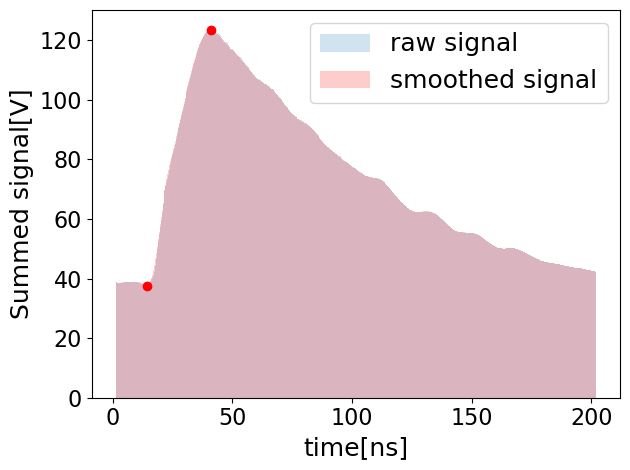

ROI determined to be [32:166]


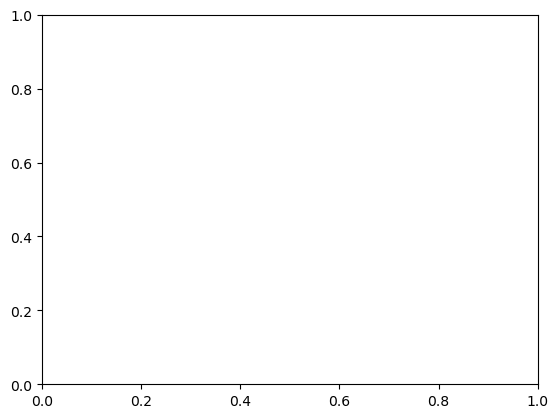

In [7]:
roi_begin, roi_end, max_loc = determine_roi(all_waveforms, True)

filtering outliers:

Calculating average values...


25000it [00:01, 23803.94it/s]


Eliminating outliers...


25000it [00:00, 25662.62it/s]


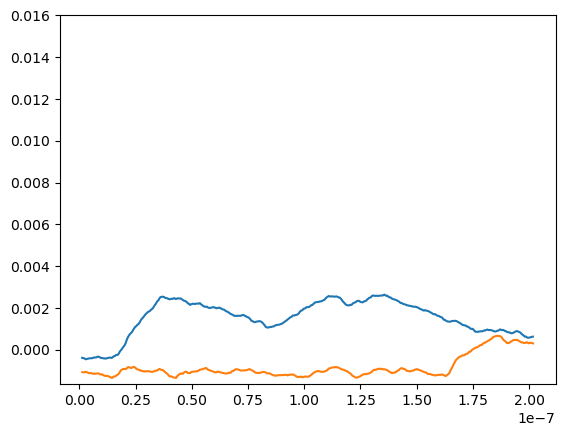

Total entries left after filtering: 22401


In [8]:
filtered_waveforms = filter_outliers(all_waveforms, max_loc, [roi_begin, roi_end], plot=True)

finding area:

Calculating areas...
Making a heatmap...


17921it [00:03, 5171.34it/s]


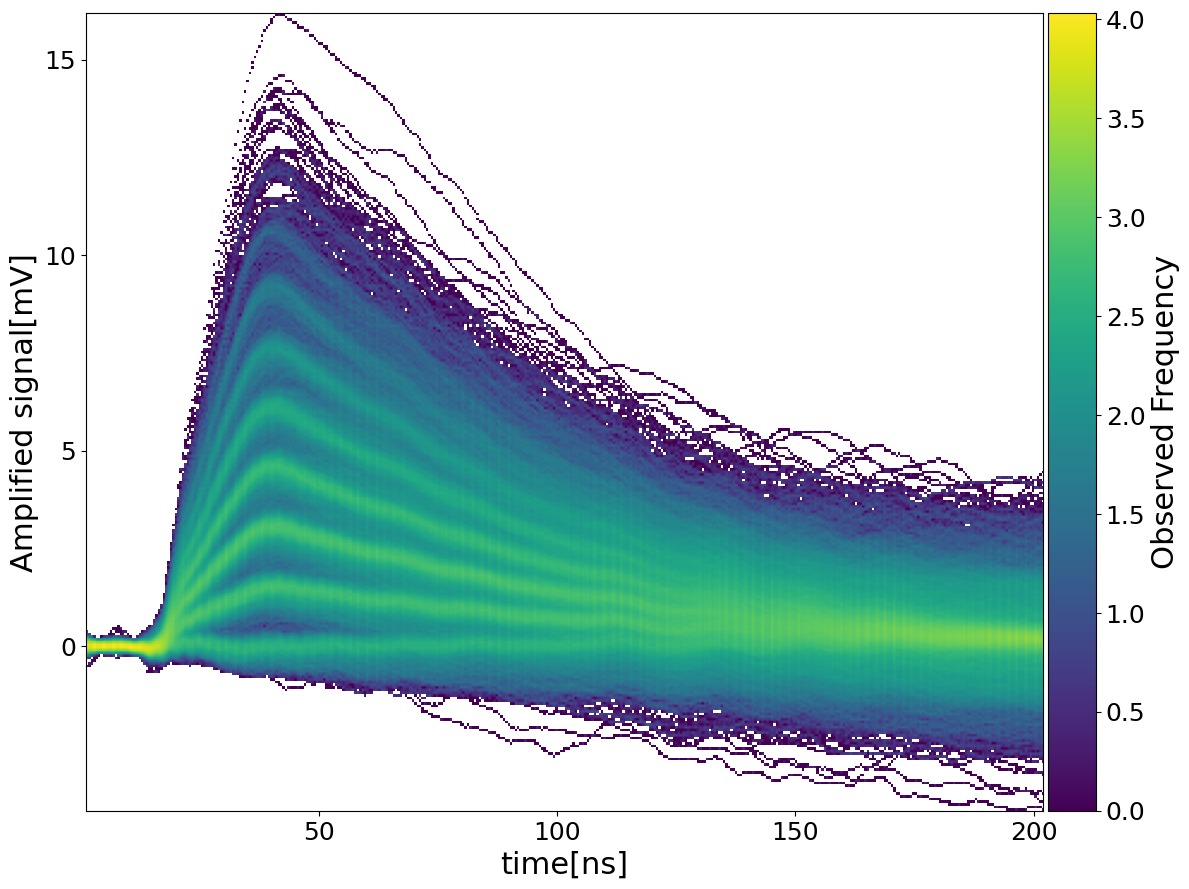

17921it [00:04, 4263.05it/s]


New ROI upper limit changed from 166 to 379.3386863658262


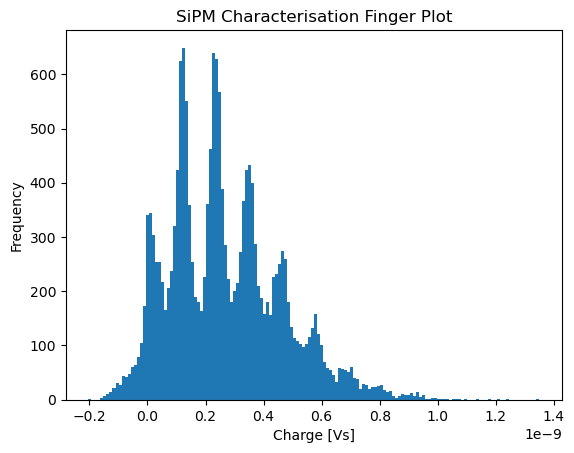

In [23]:
areas, hist, bins = find_area(filtered_waveforms, [roi_begin, roi_end], no_bins=150, plot=True, save=False, save_loc=DATA_FOLDER, savename="test.csv")

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import sys
#change this folder so the import is correct
sys.path.append("/home/todor/University/MPhys project/MPhys_project/utils/")
from scipy.stats import norm
from landaupy import landau
from landaupy import langauss
from copy import deepcopy
from iminuit import Minuit
from iminuit import cost
from scipy.optimize import curve_fit


def linear(x, a, b):
    return a * x + b

def model(x, mu1, mu2, mu3, mu4, mu5, mu7, err1, err2, err3, err4, err5, err7, n1, n2, n3, n4, n5, n7):

    return ( (norm.pdf(x, mu1, err1) * n1) + (norm.pdf(x, mu2, err2) * n2) + (norm.pdf(x, mu3, err3) * n3) + (norm.pdf(x, mu4, err4) * n4) + (norm.pdf(x, mu5, err5) * n5)  + (landau.pdf(x, mu7, err7) * n7) )


def model_gauss(x, mu1, mu2, mu3, mu4, mu5, mu6, mu7, err1, err2, err3, err4, err5, err6, err7, n1, n2, n3, n4, n5, n6, n7, err_gauss):
    return ( (norm.pdf(x, mu1, err1) * n1) + (norm.pdf(x, mu2, err2) * n2) + (norm.pdf(x, mu3, err3) * n3) + (norm.pdf(x, mu4, err4) * n4) + (norm.pdf(x, mu5, err5) * n5) + (norm.pdf(x, mu6, err6) * n6)  + (langauss.pdf(x, mu7, err7, err_gauss) * n7) )


def dep_model(x, mu0, err0, G, sigma, mu7, err7, n1, n2, n3, n4, n5, n7):
    mu=[mu0]
    err=[err0]
    for i in range(1, 5):
        mu.append(mu0 + i * G)
        err.append(np.sqrt(err0**2 + i * sigma**2) )
    
    return model(x, mu[0], mu[1], mu[2], mu[3], mu[4], mu7, err[0], err[1], err[2], err[3], err[4], err7, n1, n2, n3, n4, n5, n7)


def model_cdf(x, mu1, mu2, mu3, mu4, mu5, mu6, mu7, err1, err2, err3, err4, err5, err6, err7, n1, n2, n3, n4, n5, n6, n7):
    return norm.cdf(x, mu1, err1) * n1 + norm.cdf(x, mu2, err2) * n2 + norm.cdf(x, mu3, err3) * n3 + norm.cdf(x, mu4, err4) * n4 + norm.cdf(x, mu5, err5) * n5 + norm.cdf(x, mu6, err6) * n6  + landau.cdf(x, mu7, err7) * n7


def model_cdf_binned(bin_edges, mu1, mu2, mu3, mu4, mu5, mu6, mu7, err1, err2, err3, err4, err5, err6, err7, n1, n2, n3, n4, n5, n6, n7):
    x = get_bin_centres(bin_edges, dtype='ndarray')
    return model_cdf(x, mu1, mu2, mu3, mu4, mu5, mu6, mu7, err1, err2, err3, err4, err5, err6, err7, n1, n2, n3, n4, n5, n6, n7)


def simple_model(x, mu1, delta_mu, err1, delta_err, n1, n2, n3, n4, n5, n6):
    mu = [mu1]
    err = [err1]

    for i in range(1, 6):
        mu.append(mu1 + i * delta_mu)
        err.append(np.sqrt(err1**2 + i * delta_err**2))

    return model(x, mu[0], mu[1], mu[2], mu[3], mu[4], mu[5], err[0], err[1], err[2], err[3], err[4], err[5], n1, n2, n3, n4, n5, n6)


def plot_residuals(x, data, model, unc,fit_region , axes=None, x_scale=1):
    """Create a residuals plot on specified axes 

    Parameters
    ----------
    x : list
        x data
    data : list
        y experimental data
    model : list
        theoretical y values
    unc : list
        uncertainties on the experimental y data
    fit_region : list
        region of the fit.  NOT USED (BUT IT WILL BREAK THE CODE IF REMOVED)
    axes : matplotlib.pyplot.axes, optional
        axes object to plot on, if 'None' current axes will be used, by default None
    x_scale : int, optional
        convert x to different units (eg s to ns), by default 1

    Returns
    -------
    matplotlib.pyplot.axes
        _axes object with the residuals plot
    """
    if axes == None:
        axes = plt.gca()
    residuals = data - model
    axes.errorbar(x*x_scale, residuals, unc, fmt='.', linestyle='None')
    axes.plot(x*x_scale, np.zeros(np.shape(x)), ls='--', color='r')
    return axes


def plot_residuals_norm(x, data, model, unc,fit_region , axes=None, x_scale=1):
    """Create a normalised residuals plot on specified axes 

    Parameters
    ----------
    x : list
        x data
    data : list
        y experimental data
    model : list
        theoretical y values
    unc : list
        uncertainties on the experimental y data
    fit_region : list
        region of the fit.  NOT USED (BUT IT WILL BREAK THE CODE IF REMOVED)
    axes : matplotlib.pyplot.axes, optional
        axes object to plot on, if 'None' current axes will be used, by default None
    x_scale : int, optional
        convert x to different units (eg s to ns), by default 1

    Returns
    -------
    matplotlib.pyplot.axes
        _axes object with the normalised residuals plot
    """
    if axes == None:
        axes = plt.gca()
    unc_corr = np.where(unc == 0, np.ones(np.shape(unc)), unc)
    residuals = (data - model) / unc_corr
    axes.scatter(x*x_scale, residuals, linestyle='None')
    axes.plot(x*x_scale, np.zeros(np.shape(x)), ls='--', color='r')
    return axes


def indep_gaus_fit(histogram_areas, bins, fit_region=[-0.15e-9, 0.8e-9], method='LeastSquares', plot=False, saveplot=False, fname="", bkg="landau", plot_title=""):
    """preforms an independent fit

    Parameters
    ----------
    histogram_areas : list<float>
        list of all areas
    bins : int
        number of bins
    fit_region : list<float>, optional
        begin and end of the fit region(not all points included in the fit if the tail is too long), by default [-0.15e-9, 0.8e-9]
    method : str, optional
        cost function, 'LeastSquares' of 'likelihood', by default 'LeastSquares'
    plot : bool, optional
        print debug plots or not, by default False
    saveplot : bool, optional
        save pretty plots or not, by default False
    fname : str, optional
        filename to save the plots, by default ""
    bkg : str, optional
        distribution to model the background, 'landau', 'langauss', by default "landau"
    plot_title : str, optional
        The title to put on the plot, leave "" for no title, by default ""

    Returns
    -------
    list<float>, list<float>
        means of peaks, errors on means of peaks
    """    
    x_full = get_bin_centres(bins)
    unc = np.sqrt(histogram_areas)
    x = []
    y = []
    err = []
    bins_used = [bins[0]]
    for iterator in range(0, len(x_full)):
        if x_full[iterator] >= fit_region[0] and x_full[iterator] <= fit_region[1]:
            x.append(x_full[iterator])
            y.append(histogram_areas[iterator])
            err.append(unc[iterator])
            bins_used.append(bins[iterator + 1])
    
    err = np.array(err)
    err_corrected = np.where(err <= 1, np.full(np.shape(err), 10), err)
    bins_used = np.array(bins_used)
    y = np.array(y)
    

    #initial guesses:
    error = 1e-11
    min_error = 1e-15
    max_error = 2e-10

    mu = [0, 1.4e-10, 2.8e-10, 4.2e-10, 5.6e-10, 3e-10]
    n = 1.8e-8 / 2
    n_max = 8e-8 / 2



    x = np.array(x)
    cost_f = cost.LeastSquares(x, y, err_corrected, model)
    


    

    if(method == "likelihood"):
        cost_f = cost.ExtendedBinnedNLL(y, bins_used, model_cdf)
        
    
    p0 = [mu[0], mu[1], mu[2], mu[3], mu[4], mu[5], error, error*2.4, error*2.5, error*3, error*3, error*15, n/2, n*1.4, n*1, n*0.45, n/4, n*1.5]
    bounds_lower = [-1e-10, 0, 1e-10, 3e-10, 4e-10, 1e-10, min_error, min_error, min_error, min_error, min_error, min_error, 0, 0, 0, 0, 0, 0]
    bounds_high = [1e-10, 2.4e-10, 3.6e-10, 5e-10, 8e-10, 5e-10, max_error, max_error, max_error, max_error, max_error, max_error*10, n_max, n_max, n_max, n_max, n_max, n_max]
    fitter = Minuit(cost_f, mu1=p0[0], mu2=p0[1], mu3=p0[2], mu4=p0[3], mu5=p0[4], mu7=p0[5], err1=p0[6], err2=p0[7], err3=p0[8], err4=p0[9], err5=p0[10], err7=p0[11], n1=p0[12], n2=p0[13], n3=p0[14], n4=p0[15], n5=p0[16], n7=p0[17])
    if bkg == "langauss":
        cost_f = cost.LeastSquares(x, y, err_corrected, model_gauss)
        p0 = [mu[0], mu[1], mu[2], mu[3], mu[4], mu[5], mu[6], error, error*2.4, error*2.5, error*3, error*3, error*4, error*15, n/2, n*1.4, n*1, n*0.45, n/4, n/6, n*1.5, error*15]
        bounds_lower = [-1e-10, 0, 1e-10, 3e-10, 4e-10, 5e-10, 1e-10, min_error, min_error, min_error, min_error, min_error, min_error, min_error, 0, 0, 0, 0, 0, 0, 0, min_error]
        bounds_high = [1e-10, 2.4e-10, 3.6e-10, 5e-10, 7e-10, 8e-10, 5e-10, max_error, max_error, max_error, max_error, max_error, max_error, max_error*10, n_max, n_max, n_max, n_max, n_max, n_max, n_max, max_error*15]
        fitter = Minuit(cost_f, mu1=p0[0], mu2=p0[1], mu3=p0[2], mu4=p0[3], mu5=p0[4], mu7=p0[5], err1=p0[6], err2=p0[7], err3=p0[8], err4=p0[9], err5=p0[10], err7=p0[11], n1=p0[12], n2=p0[13], n3=p0[14], n4=p0[15], n5=p0[16], n7=p0[17], err_gauss=p0[18])
    #popt, pcov = curve_fit(model, x, histogram_areas, p0, bounds=(bounds_lower, bounds_high), maxfev=50000)
    
    

    limits_minuit = []
    for i in range(0, len(bounds_lower)):
        limits_minuit.append( (bounds_lower[i], bounds_high[i]) )
    
    fitter.limits = limits_minuit
    fitter.migrad()
    fitter.hesse()

    popt = fitter.values
    pcov = fitter.covariance
    perr = np.sqrt(np.diag(pcov))

    print(popt)
    #print(np.flatnonzero(  (err==0) ))
    #print(np.flatnonzero(  (err_corrected==0) ))
    #print(np.flatnonzero(np.isnan(histogram_areas)))
    #print(np.flatnonzero(np.isinf(histogram_areas)))
    #print(np.flatnonzero(np.isnan(x)))
    #print(np.flatnonzero(np.isinf(x)))

    if plot == True:
        plt.errorbar(x_full, histogram_areas, unc, linestyle='None', fmt='.')
        if bkg == "langauss":
            chi2(y, model_gauss(x, *popt), err_corrected)
            plt.plot(x, model_gauss(x, *popt), color='r', label='fit')
            #plt.plot(x, model_gauss(x, *p0), color='g', label="Init guess")
            #plt.plot(x, langauss.pdf(x, popt[6], popt[13], popt[21])*popt[20], color='r', ls='--')
            #plt.plot(x, langauss.pdf(x, p0[6], p0[13], popt[21])*p0[20], color='g', ls='--')
            plt.legend()
            plt.show()
            plot_residuals(x, y, model_gauss(x, *popt), err_corrected, fit_region)
        else:
        
            chi2(y, model(x, *popt), err_corrected)
        
            plt.plot(x, model(x, *popt), color='r', label='fit')
            #plt.plot(x, model(x, *p0), color='g', label="Init guess")
            #plt.plot(x, landau.pdf(x, popt[5], popt[11])*popt[17], color='r', ls='--')
            #plt.plot(x, landau.pdf(x, p0[5], p0[11])*p0[17], color='g', ls='--')
            plt.legend()
            plt.show()            
            plot_residuals(x, y, model(x, *popt), err_corrected, fit_region)

        #fig, axes = plt.subplots(1, 1)
        #plot_residuals(x, y, model(x, *p0), err_corrected, axes[0])
        
        plt.show()

    if saveplot == True:
        
        fig, axes = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, sharex=True)
        #fig.tight_layout(pad=0.8)
        fig.subplots_adjust(left=0.08, bottom=0.08, right=0.92, top=0.92, wspace=0.005, hspace=0.1)

        fig.set_size_inches(16, 9)
        axes[0].errorbar(np.array(x_full) * 10**9, histogram_areas, unc, linestyle='None', fmt='.')
        if bkg == "langauss":
            chi2(y, model_gauss(x, *popt), err_corrected)
            axes[0].plot(x * 10**9, model_gauss(x, *popt), color='r', label='model')
            axes[0].plot(x * 10**9, langauss.pdf(x, popt[5], popt[11], popt[21])*popt[20], color='r', ls='--', label="background")
            plot_residuals(np.array(x_full), histogram_areas, model_gauss(np.array(x_full), *popt), unc, fit_region, axes[1], 10**9)
        else:
            chi2(y, model(x, *popt), err_corrected)
            axes[0].plot(x * 10**9, model(x, *popt), color='r', label='model')
            axes[0].plot(x * 10**9, landau.pdf(x, popt[5], popt[11])*popt[17], color='r', ls='--', label="background")
            plot_residuals_norm(np.array(x_full), histogram_areas, model(np.array(x_full), *popt), unc, fit_region, axes[1], 10**9)
        axes[1].set_xlabel("Charge [nV.s]", fontsize=22)
        x_span = x_full[-1] - x_full[0]

        axes[0].set_ylabel("Entries [{0:3.1f} counts / (nV.ms)]".format(x_span / len(x_full) * 10**12), fontsize=22)
        axes[1].set_ylabel("Residuals", fontsize=22)
        axes[0].legend(fontsize="20")
        axes[0].tick_params(axis='y', labelsize=15)
        axes[1].tick_params(axis='both', labelsize=15)
        if plot_title != "":
            axes[0].set_title(plot_title, fontsize=23)
        loc = PLOTS_FOLDER
        fig.savefig(loc+fname)
        
        plt.show()




    means = [popt[0], popt[1], popt[2], popt[3], popt[4] ]
    err_means = [perr[0], perr[1], perr[2], perr[3], perr[4] ]

    return means, err_means


def dep_gaus_fit(histogram_areas, bins, fit_region=[-0.15e-9, 0.8e-9], method='LeastSquares', plot=False, saveplot=False, fname="", p0=None, plot_title=""):
    """preforms a dependent fit

    Parameters
    ----------
    histogram_areas : list<float>
        list of all areas
    bins : int
        number of bins
    fit_region : list<float>, optional
        begin and end of the fit region(not all points included in the fit if the tail is too long), by default [-0.15e-9, 0.8e-9]
    method : str, optional
        cost function, 'LeastSquares' of 'likelihood', by default 'LeastSquares'
    plot : bool, optional
        print debug plots or not, by default False
    saveplot : bool, optional
        save pretty plots or not, by default False
    fname : str, optional
        filename to save the plots, by default ""
    bkg : str, optional
        distribution to model the background, 'landau', 'langauss', by default "landau"
    plot_title : str, optional
        The title to put on the plot, leave "" for no title, by default ""

    Returns
    -------
    list<float>, list<float>, list<float>, list<float>, list<float>, list<float>
        gains, error gains, sigma gain, error sigma gain, sigma pedestal, error sigma pedestal
    """    
    #format the input data
    x_full = get_bin_centres(bins)
    unc = np.sqrt(histogram_areas)
    x = []
    y = []
    err = []
    bins_used = [bins[0]]
    for iterator in range(0, len(x_full)):
        if x_full[iterator] >= fit_region[0] and x_full[iterator] <= fit_region[1]:
            x.append(x_full[iterator])
            y.append(histogram_areas[iterator])
            err.append(unc[iterator])
            bins_used.append(bins[iterator + 1])
    
    err = np.array(err)
    err_corrected = np.where(err <= 1, np.full(np.shape(err), 10), err)
    bins_used = np.array(bins_used)
    y = np.array(y)
    x = np.array(x)
    
    if p0 == None:
        #define the indep params with initial guesses
        #Those are initial guesses for 56V
        mu1 = 0
        err1 = 1.15e-11
        G = 1.39e-10
        erri = 1.27e-11

        mu_bkg = 1e-10
        err_bkg = 1.1e-10

        n = 1.8e-8 / 2
        n_max = 8e-8 / 2

        p0 = [mu1, err1, G, erri, mu_bkg, err_bkg, n/2, n, n/3, n/4, n/5, n]

    #initialize Minuit object
    cost_f = cost.LeastSquares(x, y, err_corrected, dep_model)

    fitter = Minuit(cost_f, *p0)

    fitter.migrad()
    fitter.hesse()
    #fitter.minos()

    popt = fitter.values
    pcov = fitter.covariance
    perr = [0, 0, 0]
    try:
        perr = fitter.errors
        #print(fitter.merrors[2])
    except:
        print("Hessian could not be computed")
    
    if plot == True:
        chi2(y, dep_model(x, *popt), err_corrected, len(popt))
        plt.errorbar(x_full, histogram_areas, unc, linestyle='None', fmt='.')
        plt.plot(x, dep_model(x, *popt), color='r', label='fit')
        #plt.plot(x, dep_model(x, *p0), color='g', label="Init guess")
        #plt.plot(x, landau.pdf(x, popt[4], popt[5])*popt[11], color='r', ls='--')
        #plt.plot(x, landau.pdf(x, p0[4], p0[5])*p0[11], color='g', ls='--')
        plt.legend()
        plt.show()

    if saveplot == True:
        fig, axes = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, sharex=True)
        #fig.tight_layout(pad=0.8)
        fig.subplots_adjust(left=0.08, bottom=0.08, right=0.92, top=0.99, wspace=0.005, hspace=0.1)

        fig.set_size_inches(16, 9)
        axes[0].errorbar(np.array(x_full) * 10**9, histogram_areas, unc, linestyle='None', fmt='.')
        chi2(y, dep_model(x, *popt), err_corrected)
        axes[0].plot(x * 10**9, dep_model(x, *popt), color='r', label='model')
        axes[0].plot(x * 10**9, landau.pdf(x, popt[4], popt[5])*popt[11], color='r', ls='--', label="background")
        plot_residuals_norm(np.array(x_full), histogram_areas, dep_model(np.array(x_full), *popt), unc, fit_region, axes[1], 10**9)
        axes[1].set_xlabel("Charge [nV.s]", fontsize=22)
        x_span = x_full[-1] - x_full[0]

        axes[0].set_ylabel("Entries [{0:3.1f} counts / (nV.ms)]".format(x_span / len(x_full) * 10**12), fontsize=22)
        axes[1].set_ylabel("Residuals", fontsize=22)
        axes[0].legend(fontsize=22)
        axes[0].tick_params(axis='y', labelsize=15)
        axes[1].tick_params(axis='both', labelsize=15)
        if plot_title != "":
            axes[0].set_title(plot_title, fontsize=23)
        
        loc = PLOTS_FOLDER
        fig.savefig(loc+fname)
        
        plt.show()


    print(popt)
    return popt


def plot_gain(means=[], err_means=[]):
    """To be used with the independetn fit.  Plots the peak location against 
    peak number and finds the slope (gain)

    Parameters
    ----------
    means : list, optional
        locations of peaks, by default []
    err_means : list, optional
        uncertainties of locations, by default []
    """
    x = np.linspace(0, 4, 5)
    popt, pcov = curve_fit(linear, x, means, sigma=err_means, absolute_sigma=True)
    perr = np.sqrt(np.diag(pcov))

    plt.plot(x, linear(x, *popt), color='b')
    plt.errorbar(x, means, err_means, fmt='.', ls='None', color='r', capsize=4)
    plt.xlabel("peak #")
    plt.ylabel("Charge[V.s]")
    plt.title("Mean of peak vs peak number")
    plt.savefig(PLOTS_FOLDER + "example_gains_fit.png")
    plt.show()
    chi2(np.array(means), linear(x, *popt), np.array(err_means), 2)
    print(popt, perr)

    return

def procedure_indep_fit(sipm_no=411, voltage="56V", Ch=None, bin_count=600, fit_region=[-1.5e-10, 8e-10], save=False):
    """Procedure to read the areas from a file and perform the independent fit.  To be used after procedure_areas_save

    Parameters
    ----------
    sipm_no : int, optional
        The number of the sipm as written in the data file names, by default 411
    voltage : str, optional
        voltage as written in the data file names, by default "56V"
    Ch : _type_, optional
        channel prefix added by scope, by default None
    bin_count : int, optional
        bin count, by default 600
    fit_region : list, optional
        Region to fit in if not all data is to be included in the fit due to long meaningless tail, by default [-1.5e-10, 8e-10]
    save : bool, optional
        save pretty plots or not, by default False

    Returns
    -------
    list, list
        means , errors of means
    """
    fname =  "areas_sipm-" + str(sipm_no) + "_" + voltage +".csv"
    if Ch != None:
        fname = Ch + "--" + fname
    location = DATA_FOLDER
    areas = np.genfromtxt(location + fname, delimiter=',')
    hist, bins = np.histogram(areas, bins=bin_count)
    means, err_means = indep_gaus_fit(hist, bins, fit_region, plot=True, saveplot=save, fname="areas_fit_" + str(sipm_no) + "_" + voltage + ".png", plot_title="Independent fit for SiPM " + str(sipm_no) + " at " + voltage)
    return means, err_means

def procedure_dep_fit(sipm_no=411, voltage="56V", bin_size=2.7e-12, fit_region=[-1.5e-10, 8e-10], save=False, p0=[], plot_title=False):
    """Procedure to read the areas from a file and perform the dependent fit.  To be used after procedure_areas_save

    Parameters
    ----------
    sipm_no : int, optional
        sipm number as written in the areas data file, by default 411
    voltage : str, optional
        voltage as written in the areas data file, by default "56V"
    bin_size : float, optional
        the size of each bin, to ensure equal bin size over different voltages, by default 2.7e-12
    fit_region : list, optional
        Region to fit in if not all data is to be included in the fit due to long meaningless tail, by default [-1.5e-10, 8e-10]
    save : bool, optional
        save pretty plot or not, by default False
    p0 : list, optional
        initial parameters for the fit, by default []
    plot_title : bool, optional
        add title to plot or not, by default False

    Returns
    -------
    list, list, list, list, list, list
        gain, err_gain, sigma_cell, err_sigma_cell, sigma_pedestal, err_sigma_pedestal
    """
    fname =  "areas_sipm-" + str(sipm_no) + "_" + voltage +".csv"
    #if Ch != None:
    #    fname = Ch + "--" + fname
    location = DATA_FOLDER
    areas = np.genfromtxt(location + fname, delimiter=',')
    areas_span = np.max(areas) - np.min(areas)
    
    bin_count = int(areas_span / bin_size)
    #print(bin_count)
    hist, bins = np.histogram(areas, bins=bin_count)
    title = ""
    if plot_title == True:
        title = "Dependent fit for SiPM " + str(sipm_no) + " at " + voltage
    gain, err_gain, sigma_cell, err_sigma_cell, sigma_pedestal, err_sigma_pedestal = dep_gaus_fit(hist, bins, fit_region, plot=True, saveplot=save, fname="areas_fit_dep_" + str(sipm_no) + "_" + voltage + ".png", p0=p0, plot_title=title)
    return gain, err_gain, sigma_cell, err_sigma_cell, sigma_pedestal, err_sigma_pedestal


def do_all_fits(fitting_procedure, sipm_no=411, voltage=[54, 59], bin_size=2.7e-12, save=False, plot=False):
    """Call the fitting procedure function to perform fits for all voltages with a single SiPM
    Calculate SNR, breakdown voltage and save these results to a csv file in the results folder

    Parameters
    ----------
    fitting_procedure : callable
        The fitting procedure function, either 'procedure_dep_fit' or 'procedure_indep_fit'
    sipm_no : int, optional
        the sipm number as written in the areas file name, by default 411
    voltage : list, optional
        lower and upper limit of voltages to iterate over, by default [54, 59]
    bin_size : float, optional
        size of bins for all voltages, by default 2.7e-12
    save : bool, optional
        save pretty plots or not, by default False
    plot : bool, optional
        print debug plots or not, by default False
    """
    gains = []
    err_gains = []

    cell_sigmas = []
    err_cell_sigmas = []

    pedestal_sigmas = []
    err_pedestal_sigmas = []

    voltages = []

    #some initial parameters
    roi = [-0.5e-10, 4e-10]
    mu1 = 0
    err1 = 1e-11
    G = 0.75e-10
    erri = 1.27e-11
    mu_bkg = 0.1e-10
    err_bkg = 0.6e-10
    n = 1.8e-8 
    n_bkg = n

    for V in range(voltage[0], voltage[-1] + 1):
        voltages.append(V)
        V_string = str(V) + "V"
        print("==========================================")
        print("Fitting for " + V_string)
        p0 = [mu1, err1, G, erri, mu_bkg, err_bkg, n/1.2, n/1.5, n/3, n/10, 0, n_bkg]
        gain, error_gain, sigma_cell, error_sigma_cell, sigma_pedestal, error_sigma_pedestal = fitting_procedure(sipm_no, V_string, bin_size, roi, save, p0)
        gains.append(gain)
        err_gains.append(error_gain)
        cell_sigmas.append(sigma_cell)
        err_cell_sigmas.append(error_sigma_cell)
        pedestal_sigmas.append(sigma_pedestal)
        err_pedestal_sigmas.append(error_sigma_pedestal)
        G += 0.325e-10
        mu_bkg += 0.15e-10
        roi[0] -= 0.5e-10
        roi[1] += 2e-10
        err_bkg += 0.2e-10
        n_bkg += n / 2
        n /= np.sqrt(2)

    voltages = np.array(voltages)
    gains = np.array(gains)
    err_gains = np.array(err_gains)
    cell_sigmas = np.array(cell_sigmas)
    err_cell_sigmas = np.array(err_cell_sigmas)
    pedestal_sigmas = np.array(pedestal_sigmas)
    err_pedestal_sigmas = np.array(err_pedestal_sigmas)



    #-------------------------Gain Voltage curve----------------------------------------
    popt, pcov = curve_fit(linear, voltages, gains, sigma=err_gains, absolute_sigma=True)
    perr = np.sqrt(np.diag(pcov))
    ampl_factor = 10.1 * 50
    gains_e = gains / 1.6e-19 / ampl_factor
    err_gains_e = err_gains / 1.6e-19 /ampl_factor
    plt.errorbar(voltages, gains_e, err_gains_e , ls='None', fmt='.', capsize=5.0)
    plt.plot(voltages, linear(voltages, *popt) / 1.6e-19 /ampl_factor)
    plt.xlabel("Voltage[V]")
    plt.ylabel("Gain [#e]")
    plt.title("Gain-Voltage curve")
    #plt.plot(voltages, np.zeros(np.shape(voltages)), color='r', ls='--')
    breakdown_V = -popt[1] / popt[0]
    err_breakdown_V = breakdown_V * np.sqrt( (perr[0] / popt[0])**2 + (perr[1] / popt[1])**2 )
    chi2(gains, linear(voltages, *popt), err_gains, 2)
    print( "The breakdown voltage is: {0:3.1f} +/- {1:3.1f}".format(breakdown_V, err_breakdown_V))


    if plot == True:
        fname = "gain_voltage_sipm-" + str(sipm_no) + ".png"
        loc = PLOTS_FOLDER
        plt.savefig(loc + fname)

    plt.show()



    #-------------------------SNR Calculation------------------------------------------

    delimiter = pedestal_sigmas**2 + cell_sigmas**2 
    SNR = gains / np.sqrt(delimiter)
    part_err_delimiter =  np.sqrt( (err_pedestal_sigmas * pedestal_sigmas * 2)**2 + (err_cell_sigmas * cell_sigmas *2)**2)
    err_delimiter = part_err_delimiter / (2 * np.sqrt(delimiter))
    err_SNR = SNR * np.sqrt((err_gains / gains)**2 + (err_delimiter / np.sqrt(delimiter))**2)
    fname = "snr_sipm-" + str(sipm_no) + ".png"
    plt.errorbar(voltages, SNR, err_SNR, fmt='.', ls='None', capsize=2)
    plt.xlabel("Voltage[V]")
    plt.ylabel("SNR")
    if plot == True:
        plt.savefig(loc + fname)
    plt.show()
    


    #----------------------save results------------------------------------------------
    voltages = np.array([voltages])
    gains = np.array([gains_e])
    err_gains = np.array([err_gains_e])
    SNR = np.array([SNR])
    err_SNR = np.array([err_SNR])

    results = np.concatenate([voltages.T, gains.T, err_gains.T, SNR.T, err_SNR.T], axis=1)
    loc = RESULTS_FOLDER
    fname = "results_sipm-" + str(sipm_no) + ".csv"
    if plot == True:
        np.savetxt(loc+fname, results, delimiter=',', header='voltage[V], gain[#e], err_gain[#e], SNR, err_SNR')
        print("Saved gains and SNR to file: " + loc + fname)


def overvoltages_plot(sipm_no=[411, 412, 413, 414, 417, 418, 419], voltage=4):
    """Reads data from the results folder and plots all gains at a certain overvoltage

    Parameters
    ----------
    sipm_no : list, optional
        numbers of sipms to be plotted, by default [411, 412, 413, 414, 417, 418, 419]
    voltage : int, optional
        the overvoltage to plot for, by default 4
    """
    G_overvoltage = []
    err_G_overvoltage = []
    breakdowns = []
    err_breakdowns = []
    for sipm in sipm_no:
        loc = RESULTS_FOLDER
        fname = "results_sipm-" + str(sipm) + ".csv"
        data = np.genfromtxt(loc+fname, delimiter=',', skip_header=1)
        data[:, 1] /= 500
        data[:, 2] /= 500
        p0=[ 1.68893835e+06, -8.67367450e+07]
        popt, pcov = curve_fit(linear, data[:, 0], data[:, 1], sigma=data[:, 2], absolute_sigma=True, p0=p0)
        perr = np.sqrt(np.diag(pcov))
        breakdown_V = -popt[1] / popt[0]
        err_breakdown_V = breakdown_V * np.sqrt( (perr[0] / popt[0])**2 + (perr[1] / popt[1])**2 )
        V = breakdown_V + voltage
        G = popt[0] * V + popt[1]
        err_G_1 = popt[0] * V * np.sqrt( (perr[0] / popt[0])**2 + (err_breakdown_V / breakdown_V)**2 )
        err_G = np.sqrt(err_G_1**2 + perr[1]**2)
        G_overvoltage.append(G)
        err_G_overvoltage.append(err_G)
        breakdowns.append(breakdown_V)
        err_breakdowns.append(err_breakdown_V)
        #debug plot
        print(breakdown_V, err_breakdown_V)
        print(G, err_G)
        #plt.errorbar(data[:, 0], data[:, 1], data[:, 2], ls='None', fmt='.')
        #plt.plot(data[:, 0], linear(data[:, 0], *popt))
        #plt.show()

    x = np.linspace(1, len(sipm_no), len(sipm_no))
    plt.errorbar(x, breakdowns, err_breakdowns, fmt='.', ls='None', capsize=2)
    plt.xticks(x, sipm_no)
    plt.xlabel("SiPM #", fontsize=16)
    plt.ylabel("Breakdown voltage [V]", fontsize=16)
    plt.tick_params('both', labelsize=14)
    plt.tight_layout()
    plt.savefig(PLOTS_FOLDER + "breakdown_V_all.png", dpi=600)
    plt.show()

    plt.errorbar(x, G_overvoltage, err_G_overvoltage, ls='None', fmt='.', capsize=2)
    plt.xticks(x, sipm_no)
    plt.xlabel("SiPM #", fontsize=16)
    plt.ylabel("Gain[#e]", fontsize=16)
    plt.tick_params('both', labelsize=14)
    plt.tight_layout()
    
    plt.savefig(PLOTS_FOLDER + "4_overvolts_all.png", dpi=600)
    plt.show()

Chi2 : 1090.7009099479924 and chi2 per DoF : 8.200758721413477


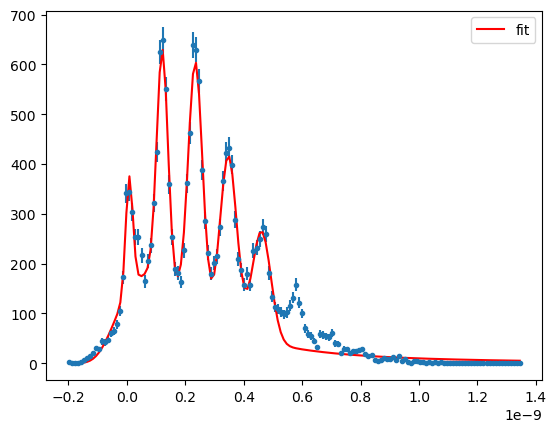

Chi2 : 1090.7009099479924 and chi2 per DoF : 8.795975080225745


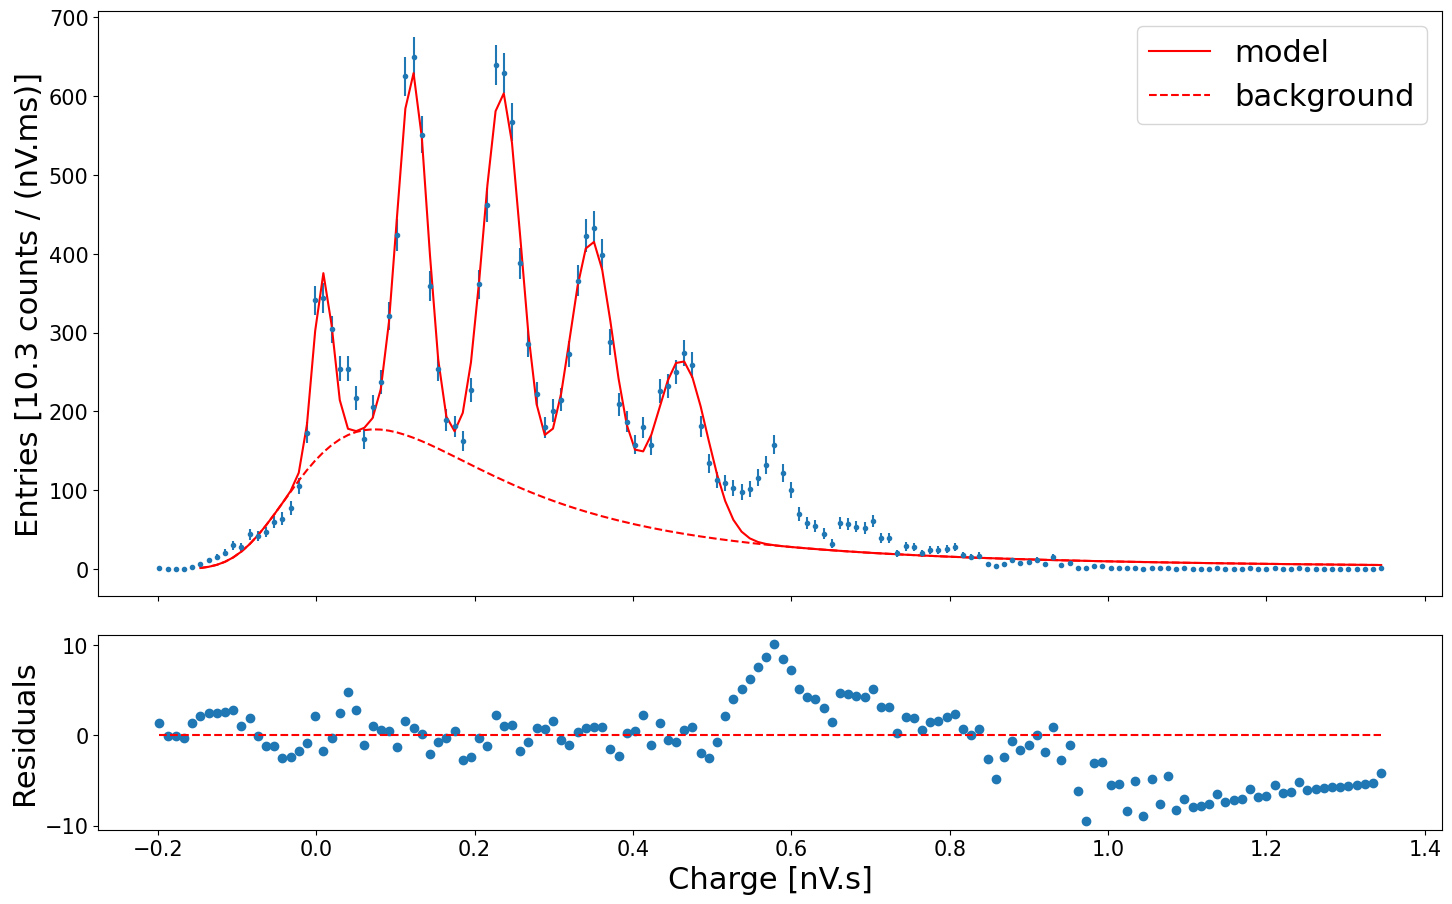

<ValueView mu0=8.4230000505293e-12 err0=1.2199977571096946e-11 G=1.1319850793796108e-10 sigma=1.4749555812791194e-11 mu7=7.367095883539895e-11 err7=8.282273908261704e-11 n1=6.95186765311257e-09 n2=2.224021449756733e-08 n3=2.983458687970286e-08 n4=2.4555601026310822e-08 n5=1.7587884648805266e-08 n7=8.129219054587709e-08>


In [11]:
dep_fit = dep_gaus_fit(hist, bins, fit_region=[-0.15e-9, 1.35e-9], method='LeastSquares', plot=True, saveplot=True, fname="", p0=None, plot_title="")
#indep_fit = indep_gaus_fit(hist, bins, fit_region=[-0.15e-9, 1.35e-9], method='LeastSquares', plot=True, saveplot=True, fname="", bkg="landau", plot_title="")

(range(0, 150), 8.4230000505293e-12, 1.2162150798849038e-10, 2.348200159264515e-10, 3.4801852386441254e-10, 4.612170318023736e-10, 7.367095883539895e-11, 1.2199977571096946e-11, 1.9141286513970555e-11, 2.416481421580877e-11, 2.831055709023042e-11, 3.19223595530443e-11, 8.282273908261704e-11, 6.95186765311257e-09, 2.224021449756733e-08, 2.983458687970286e-08, 2.4555601026310822e-08, 1.7587884648805266e-08, 8.129219054587709e-08)


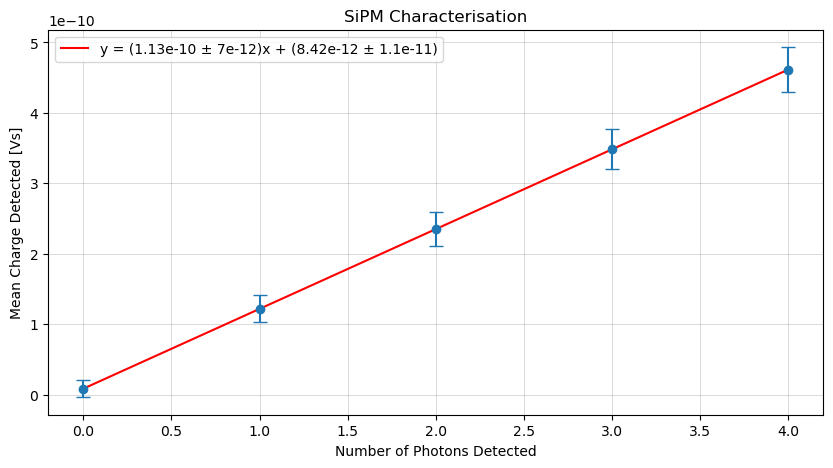

Slope: 1.13e-10 ± 6.71e-12
Intercept: 8.42e-12 ± 1.1e-11


In [19]:
def dep_model(x, mu0, err0, G, sigma, mu7, err7, n1, n2, n3, n4, n5, n7):
    mu=[mu0]
    err=[err0]
    for i in range(1, 5):
        mu.append(mu0 + i * G)
        err.append(np.sqrt(err0**2 + i * sigma**2) )
    
    return x, mu[0], mu[1], mu[2], mu[3], mu[4], mu7, err[0], err[1], err[2], err[3], err[4], err7, n1, n2, n3, n4, n5, n7

dep_model1 = dep_model(range(len(hist)), dep_fit[0], dep_fit[1], dep_fit[2], dep_fit[3], dep_fit[4], dep_fit[5], dep_fit[6], dep_fit[7], dep_fit[8], dep_fit[9], dep_fit[10], dep_fit[11])
print(dep_model1)
# Data points
photons = np.array([0, 1, 2, 3, 4])
means = np.array([dep_model1[1], dep_model1[2], dep_model1[3], dep_model1[4], dep_model1[5]])
errors = np.array([dep_model1[7], dep_model1[8], dep_model1[9], dep_model1[10], dep_model1[11]])

from scipy.optimize import curve_fit

# Define the linear function
def linear(x, m, c):
    return m * x + c

# Perform the fit
popt, pcov = curve_fit(linear, photons, means, sigma=errors, absolute_sigma=True)

# Extract the slope and intercept
slope, intercept = popt

# Calculate the uncertainties (square root of the diagonal of the covariance matrix)
slope_error, intercept_error = np.sqrt(np.diag(pcov))

# Generate x values for the line of best fit
x_fit = np.linspace(min(photons), max(photons), 100)
y_fit = linear(x_fit, slope, intercept)

# Plot the data with error bars and the best-fit line
plt.figure(figsize=(10, 5))
plt.errorbar(photons, means, yerr=errors, fmt='o', capsize=5)
plt.plot(x_fit, y_fit, label=f"y = ({slope:.2e} ± {slope_error:.0e})x + ({intercept:.2e} ± {intercept_error:.1e})", color='red')

# Add labels, title, and grid
plt.title("SiPM Characterisation")
plt.xlabel("Number of Photons Detected")
plt.ylabel("Mean Charge Detected [Vs]")
plt.legend()
plt.grid(color='black', linestyle='-', linewidth=0.5, alpha=0.2)

# Show the plot
plt.show()

# Print the slope, intercept, and their errors
print(f"Slope: {slope:.2e} ± {slope_error:.2e}")
print(f"Intercept: {intercept:.2e} ± {intercept_error:.1e}")
